In [1]:
from PIL import Image
import numpy as np
from tqdm import tqdm

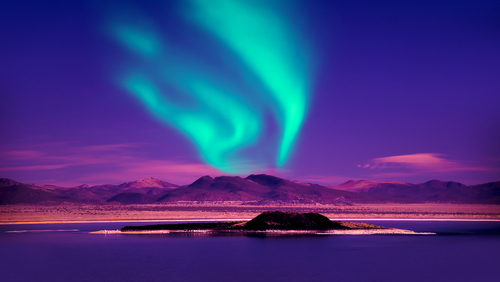

In [2]:
img = Image.open("./aurora.jpg")
img

In [3]:
data = np.asarray(img)

[height, width] = data.shape[0:2]

def pick_seed(data, cnt):
    points = []
    for i in range(cnt):
        y = int(np.random.random() * height)
        x = int(np.random.random() * width)
        
        points.append(data[y][x])
    return points

k = 64
centroids = np.array(pick_seed(data, k))

def clustering(centroids, data):
    dists = np.zeros((height, width, k))
    for i in range(k):
        dist = np.linalg.norm(data - centroids[i], axis = 2)
        dists[:, :, i] = dist
    cls = np.argmin(dists, axis = 2)
    return cls
    
def recalc_centroids(data, cls):
    ctr = np.zeros((k, 3))
    for i in range(k):
        items = data[cls == i]
        if (items.size > 0):
            ctr[i, :] = np.mean(items, axis = 0)
    return ctr

old_clusters = np.zeros((height, width))
clustered_pixels = clustering(centroids, data)

while True:
    if np.all(old_clusters == clustered_pixels):
        break
        
    old_clusters = clustered_pixels
    
    centroids = recalc_centroids(data, clustered_pixels)
    
    clustered_pixels = clustering(centroids, data)

In [4]:
data.max(), data.min()

(255, 0)

In [5]:
centroids[0]

array([  49.4314817 ,   26.70389672,  106.84590785])

In [6]:
new_image = np.zeros((height, width, 3))

for row in range(height):
    for col in range(width):
        new_image[row, col, :] = centroids[int(clustered_pixels[row][col])]

In [7]:
new_image = new_image.astype("uint8")

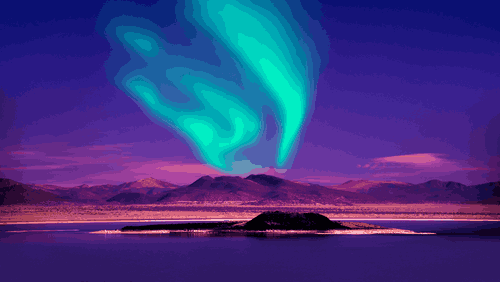

In [8]:
Image.fromarray(new_image, "RGB")

In [9]:
np.sum((data.astype("float") - new_image.astype("float")) ** 2) / data.size

26.772368794326241